In [1]:
%load_ext autoreload
%autoreload 2
from sage.all import *
from utility import *

In [2]:
# Define here the equation defining your affine variety.
x,y,z,w = var('x, y, z, w', domain=CC)

X = x*y*z + x + z + 1

# Defining the Lefschetz Bifibration

## The fibration $\pi$

The fibre over t in C is -1/2*(t + 3*x - y)*x*y - 1/2*t - 1/2*x + 1/2*y + 1 == 0
The model fibre over 1/2*I is -1/4*(6*x - 2*y + I)*x*y - 1/2*x + 1/2*y - 1/4*I + 1 == 0
Critical values: 5 
Critical points: 5


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Critical values of pi'}>)

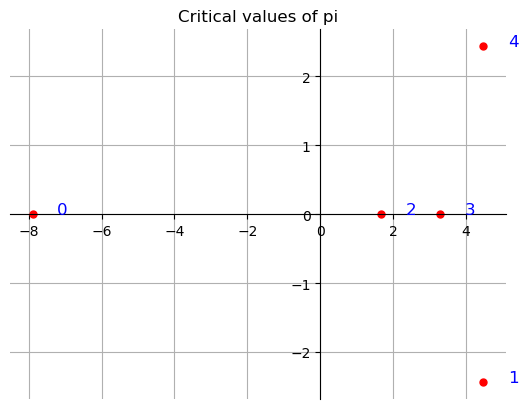

In [12]:
alpha, beta, gamma = var('alpha, beta, gamma', domain=CC)
pi = alpha*x + beta*y + gamma*z


pi = pi.subs({
    alpha: -3,
    beta: 1,
    gamma: -2
})

pi = LefschetzFibration([x,y,z], X, pi)
origin_fibre = I/2
solvefor=z

t = var('t', domain=CC)

t_fibre = pi.get_fibre(t, solvefor)
print(f'The fibre over t in C is {t_fibre==0}')
print(f'The model fibre over {origin_fibre} is {t_fibre.subs({t:origin_fibre})==0}')

crit_values_pi = sort_by_angle(pi.get_critical_values(), origin_fibre)
crit_points_pi = pi.get_critical_points()

print(f'Critical values: {len(crit_values_pi)} \nCritical points: {len(crit_points_pi)}')

plot_points_ordered(crit_values_pi, 'Critical values of pi', origin_fibre=origin_fibre)

## The fibration $\rho$

The expression of rho over t in C is x + I*y
Critical values: 6
Critical points: 6


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Critical values of rho'}>)

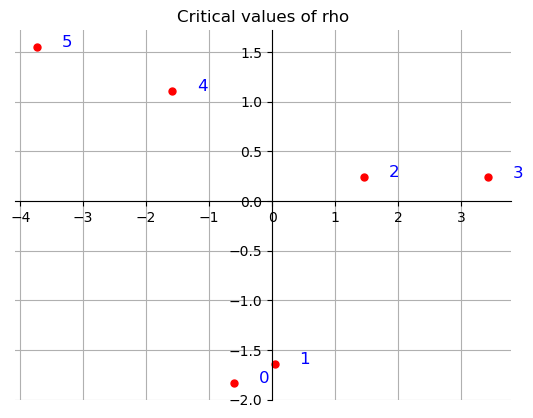

In [13]:
rho = x+I*y

rho_t = rho.subs(solvefor == t_fibre)
rho_0 = rho_t.subs(t==origin_fibre)


rho = LefschetzFibration([x,y], t_fibre.subs(t==origin_fibre), rho_0)

crit_points_rho = rho.get_critical_points()
crit_values_rho = sort_by_angle(rho.get_critical_values())
# Somehow crit values is bugging out

# a = var('a', domain=CC)
# constraints = [rho.domain==0]
# gradient_constraints = [rho.domain.diff(variable) == a*rho.fibration.diff(variable) for variable in rho.variables]
# a_solved = solve(gradient_constraints[0], a)[0]
# b = gradient_constraints[0]
# gradient_constraints = [constraint.lhs() - constraint.rhs().subs(a_solved) ==0 for constraint in gradient_constraints[1:]]
# constraints.extend(gradient_constraints)
# print(constraints)

# crit_points_rho = solve(constraints, rho.variables)
# crit_points_rho = [[expression.lhs() == expression.rhs().n() for expression in solution] for solution in crit_points_rho]
# crit_values_rho = sort_by_angle([rho(cpoint) for cpoint in crit_points_rho])

# print(crit_points_rho)

print(f'The expression of rho over t in C is {rho_t}')
print(f'Critical values: {len(crit_values_rho)}')
print(f'Critical points: {len(crit_points_rho)}')
plot_points_ordered(crit_values_rho, origin_fibre=origin_fibre, title="Critical values of rho")


### Vanishing Cycles of Rho

#### Origin Fibre

-1/4*I*(-(2*I - 6)*x + I)*x^2 + (1/2*I - 1/2)*x - 1/4*I + 1


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Fibre over 0 of rho'}>)

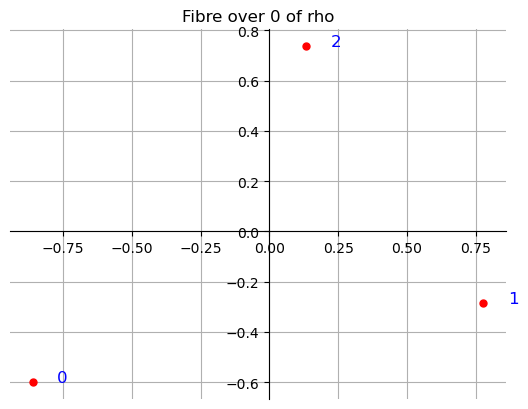

In [14]:
origin_fibre_rho = 0
solvefor_rho = y

t_fibre_rho = rho.get_fibre(t,solvefor_rho)
fibre_rho_0 = t_fibre_rho.subs(t==origin_fibre_rho)
print(fibre_rho_0)

sols = NumericalRoots(fibre_rho_0)

plot_points_ordered(sols, origin_fibre=origin_fibre_rho, title="Fibre over 0 of rho")


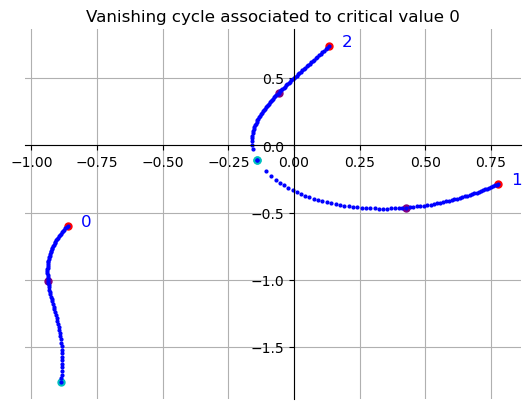

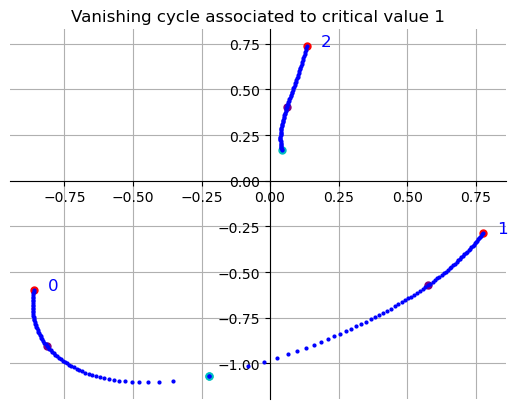

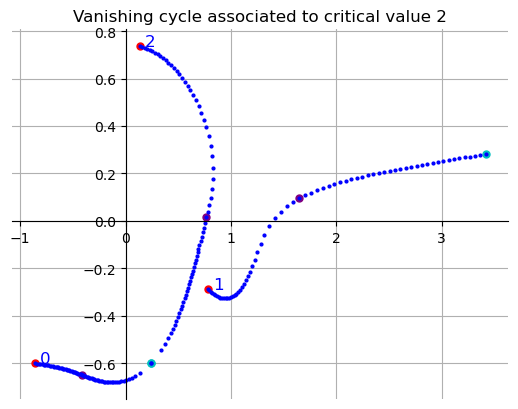

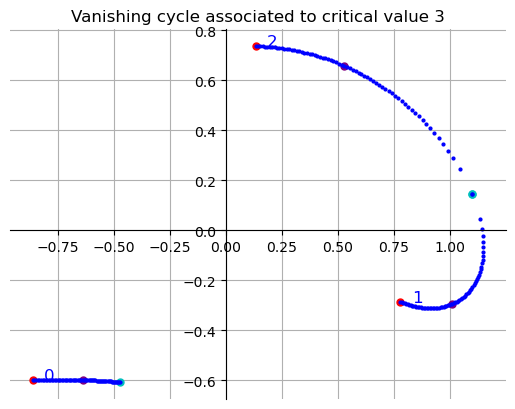

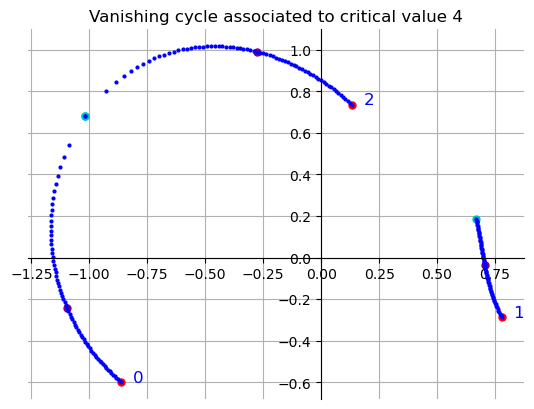

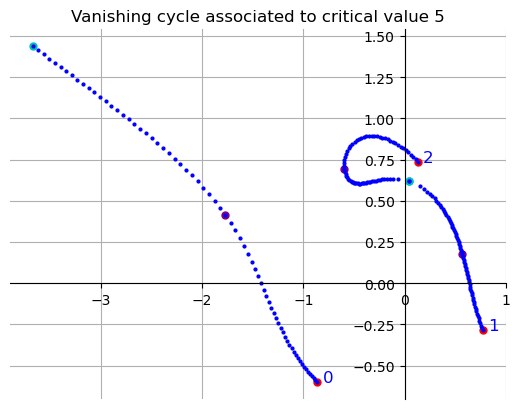

In [15]:
for (index, point) in enumerate(crit_values_rho):
    path = pl_path([origin_fibre_rho, point])
    trace_preimage(rho, t, path, solvefor=solvefor_rho, title=f'Vanishing cycle associated to critical value {index}')    

## Matching Paths - Images of Vanishing Cycles

In [16]:
for index, crit in enumerate(crit_values_pi):
    matching = pi.get_matching_path(rho_0, origin_fibre, crit, solvefor=solvefor)
    plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre)

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object